In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
col_names = ['age','workclass','fnlwgt','education', 'education-num', 'marital-status', 'occupation','relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'target']

In [3]:
df = pd.read_csv("adult_data.csv", header=None)

In [4]:
df.columns = col_names

In [5]:
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [8]:
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
target                2
dtype: int64

In [9]:
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [10]:
df['workclass']=df['workclass'].str.replace('?', 'Private')
# '?' replaced with most occurance data(mode)

C:\Users\HOME\AppData\Local\Temp\ipykernel_15476\2513097934.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['workclass']=df['workclass'].str.replace('?', 'Private')


In [11]:
df['workclass'].value_counts()

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [12]:
df['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [13]:
df['occupation']=df['occupation'].str.replace('?', 'Prof-specialty')

C:\Users\HOME\AppData\Local\Temp\ipykernel_15476\2537735177.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['occupation']=df['occupation'].str.replace('?', 'Prof-specialty')


In [14]:
df['occupation'].value_counts()

 Prof-specialty       5983
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [15]:
df['race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [17]:
df['native-country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [18]:
df['native-country']=df['native-country'].str.replace('?', 'United-States')

C:\Users\HOME\AppData\Local\Temp\ipykernel_15476\121485024.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['native-country']=df['native-country'].str.replace('?', 'United-States')


In [19]:
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [20]:
df['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [21]:
#df['education'] = df['education'].str.replace(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th'], 'school')
#Didnt work abobe line

In [22]:
df['education'] = df['education'].str.replace('Preschool', 'school')
df['education'] = df['education'].str.replace('1st-4th', 'school')
df['education'] = df['education'].str.replace('5th-6th', 'school')
df['education'] = df['education'].str.replace('7th-8th', 'school')
df['education'] = df['education'].str.replace('9th', 'school')
df['education'] = df['education'].str.replace('10th', 'school')
df['education'] = df['education'].str.replace('11th', 'school')
df['education'] = df['education'].str.replace('12th', 'school')

df['education'] = df['education'].str.replace('HS-grad', 'high school')
df['education'] = df['education'].str.replace('Assoc-voc', 'higher')
df['education'] = df['education'].str.replace('Assoc-acdm', 'higher')
df['education'] = df['education'].str.replace('Some-college', 'higher')
df['education'] = df['education'].str.replace('Prof-school', 'higher')
df['education'] = df['education'].str.replace('Doctorate', 'phd')
df['education'] = df['education'].str.replace('Masters', 'Post-Grad')
df['education'] = df['education'].str.replace('Bachelors', 'Grad')









In [23]:
df['education'].value_counts()

 high school    10501
 higher         10316
 Grad            5355
 school          4253
 Post-Grad       1723
 phd              413
Name: education, dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [25]:
df['marital-status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

In [26]:
df['marital-status'] = df['marital-status'].str.replace('Married-civ-spouse', 'married')
df['marital-status'] = df['marital-status'].str.replace('Married-AF-spouse', 'married')
df['marital-status'] = df['marital-status'].str.replace('Married-AF-spouse', 'married')
df['marital-status'] = df['marital-status'].str.replace('Never-married', 'Un-married')


In [27]:
#df['marital-status'] = df['marital-status'].map({'Divorced':'others', 'Separated':'others', 'Married-spouse-absent': 'others', 'Widowed':'others'})
#above line Didnot work

In [32]:
df['marital-status'] = df['marital-status'].str.replace('Divorced', 'others')
df['marital-status'] = df['marital-status'].str.replace('Separated', 'others')
df['marital-status'] = df['marital-status'].str.replace('Widowed', 'others')
df['marital-status'] = df['marital-status'].str.replace('Married-spouse-absent', 'others')


In [33]:
df['marital-status'].value_counts()

 married       14999
 Un-married    10683
 others         6879
Name: marital-status, dtype: int64

In [35]:
df['target'].value_counts()

 <=50K    24720
 >50K      7841
Name: target, dtype: int64

In [41]:
df['target'] = df['target'].str.replace('<=50K', '0')
df['target'] = df['target'].str.replace('>50K', '1')

In [43]:
df['target'].dtype

dtype('O')

In [45]:
df['target']=df['target'].astype('int')

In [46]:
df['target'].dtype

dtype('int32')

In [47]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Grad,13,Un-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Grad,13,married,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,high school,9,others,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,school,7,married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Grad,13,married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [48]:
df['relationship'].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

In [49]:
df['relationship']=df['relationship'].str.replace('Unmarried','others')
df['relationship']=df['relationship'].str.replace('Not-in-family','others')
df['relationship']=df['relationship'].str.replace('Other-relative','others')


In [50]:
df['relationship'].value_counts()

 Husband      13193
 others       12732
 Own-child     5068
 Wife          1568
Name: relationship, dtype: int64

In [54]:
df['hours-per-week'].value_counts()

40    15217
50     2819
45     1824
60     1475
35     1297
      ...  
82        1
92        1
87        1
74        1
94        1
Name: hours-per-week, Length: 94, dtype: int64

In [55]:
df['occupation'].value_counts()

 Prof-specialty       5983
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

# Data Visulization

array([[<AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'fnlwgt'}>,
        <AxesSubplot: title={'center': 'education-num'}>],
       [<AxesSubplot: title={'center': 'capital-gain'}>,
        <AxesSubplot: title={'center': 'capital-loss'}>,
        <AxesSubplot: title={'center': 'hours-per-week'}>],
       [<AxesSubplot: title={'center': 'target'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

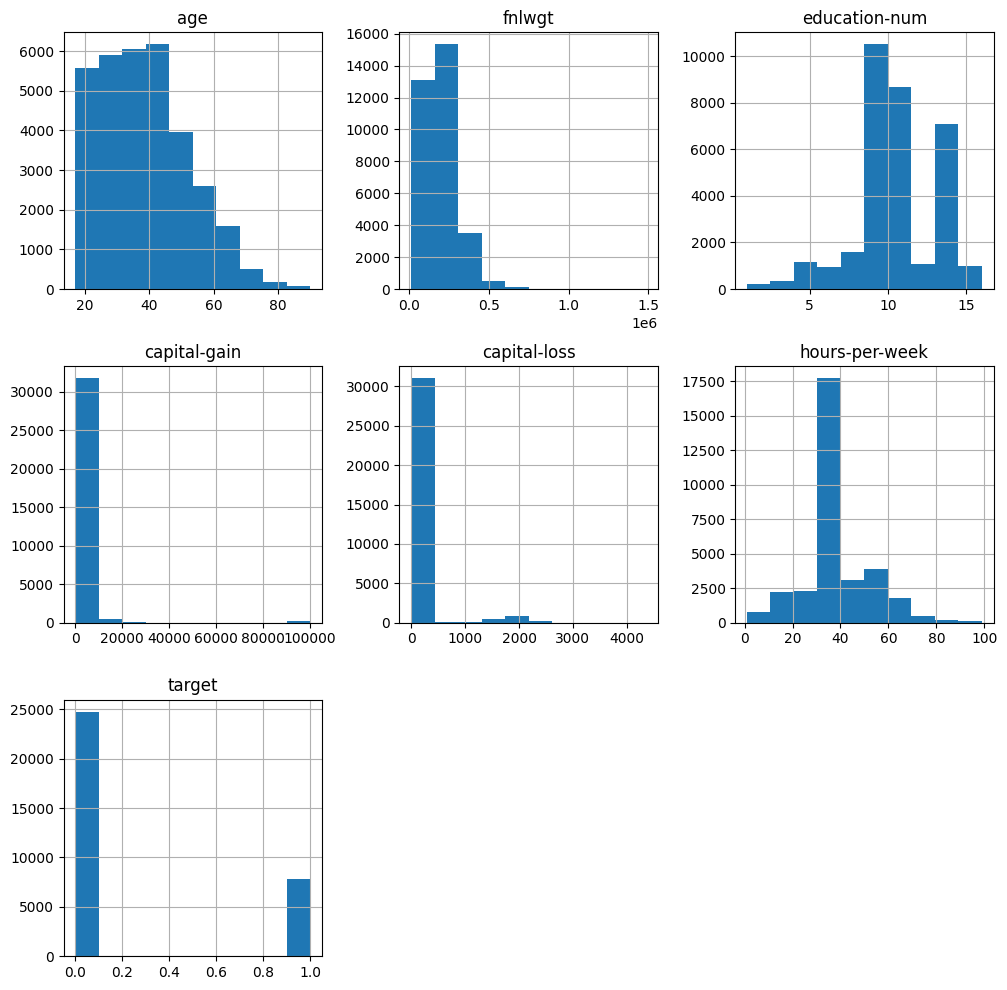

In [57]:
df.hist(figsize=(12,12), layout=(3,3), sharex=False)

In [65]:
import plotly.express as px

age                  AxesSubplot(0.125,0.653529;0.227941x0.226471)
fnlwgt            AxesSubplot(0.398529,0.653529;0.227941x0.226471)
education-num     AxesSubplot(0.672059,0.653529;0.227941x0.226471)
capital-gain         AxesSubplot(0.125,0.381765;0.227941x0.226471)
capital-loss      AxesSubplot(0.398529,0.381765;0.227941x0.226471)
hours-per-week    AxesSubplot(0.672059,0.381765;0.227941x0.226471)
target                   AxesSubplot(0.125,0.11;0.227941x0.226471)
dtype: object

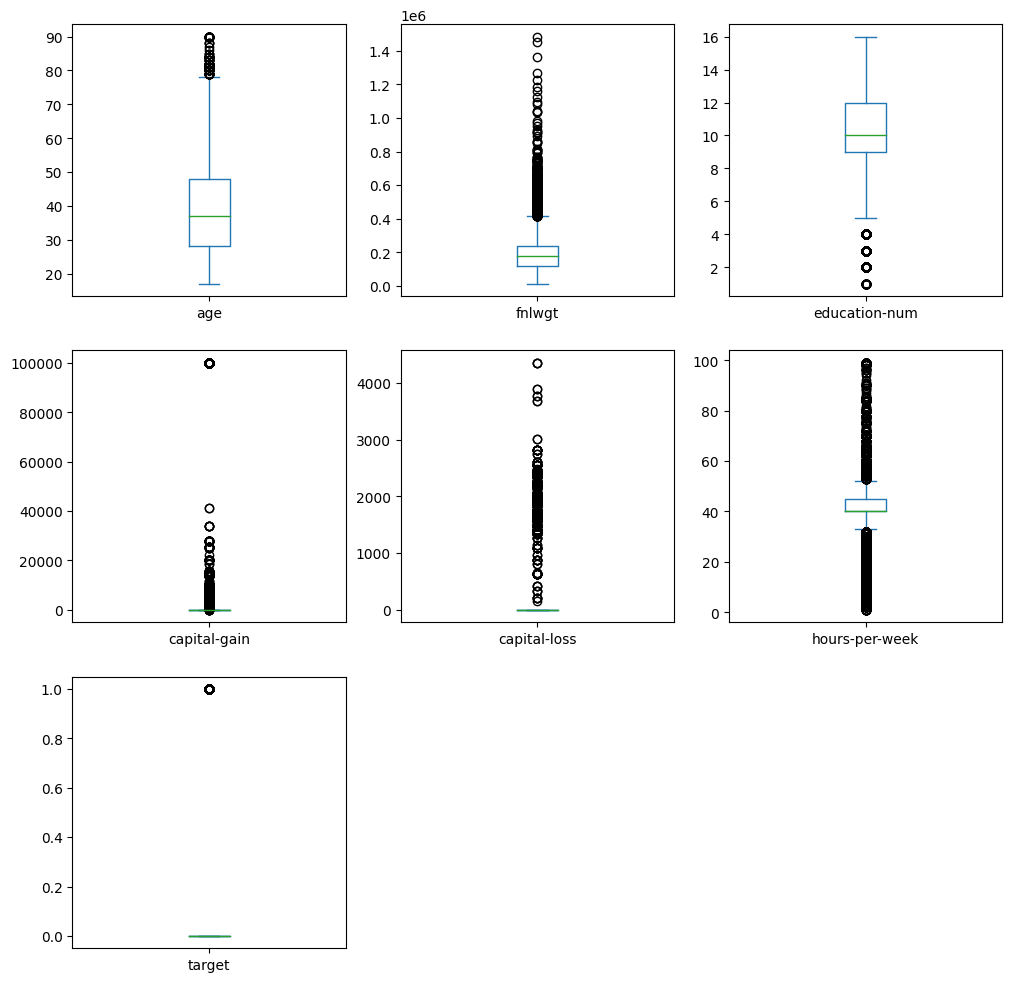

In [59]:
df.plot(kind='box', figsize=(12,12), layout=(3,3), sharex=False, subplots = True)

<AxesSubplot: >

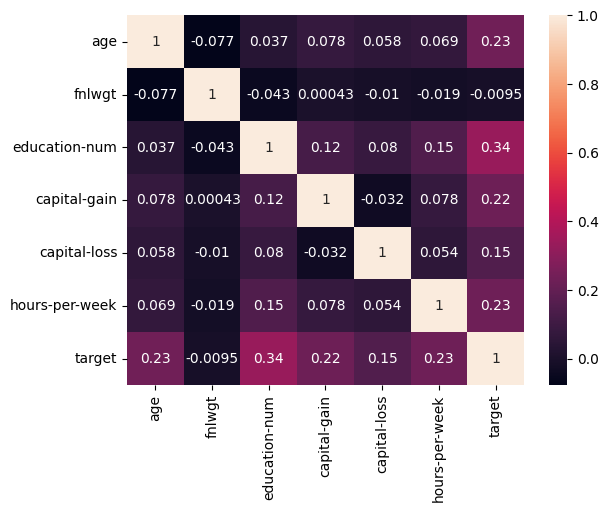

In [60]:
sns.heatmap(df.corr(), annot=True)

In [69]:
plt=px.pie(df, values='education-num', names='education', title = 'Percentage of Education', color_discrete_sequence = px.colors.qualitative.T10)
plt.show()

C:\Users\HOME\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot: xlabel='workclass', ylabel='count'>

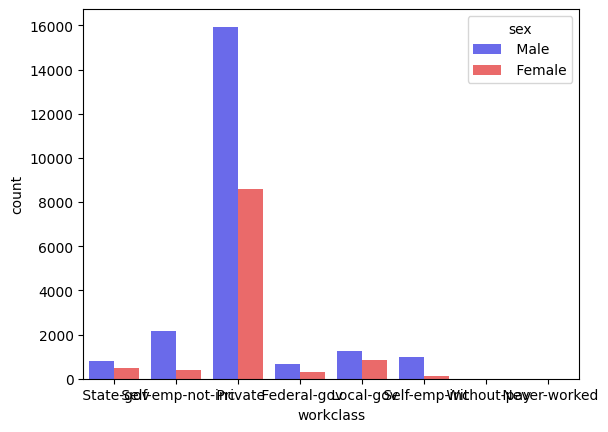

In [74]:
sns.countplot(df['workclass'], hue='sex', data=df, palette='seismic',orient=90 )

<AxesSubplot: xlabel='age', ylabel='education'>

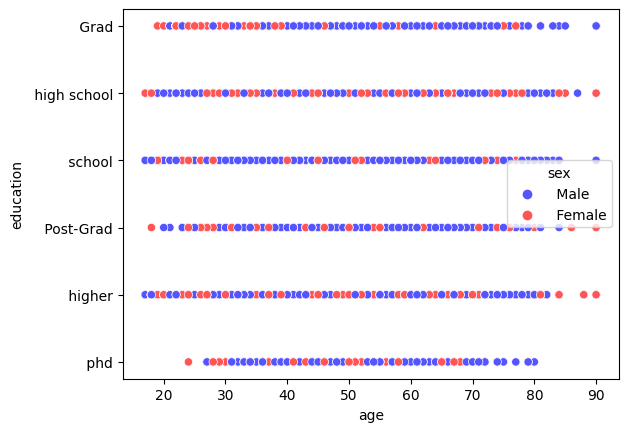

In [83]:
sns.scatterplot(data=df, x='age', y='education', hue='sex', style=None, palette='seismic', markers=True, legend='auto', ax=None)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  target          32561 non-null  int32 
dtypes: int32(1), int64(6), object(8)
memory usage: 3.6+ MB


<AxesSubplot: xlabel='age', ylabel='native-country'>

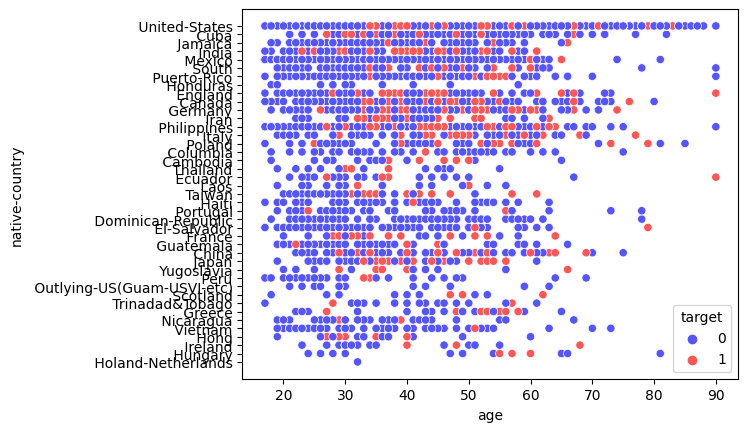

In [91]:
sns.scatterplot(data=df, x='age', y='native-country', hue='target', style=None, palette='seismic', markers=True, legend='auto', ax=None)

<AxesSubplot: xlabel='marital-status', ylabel='education'>

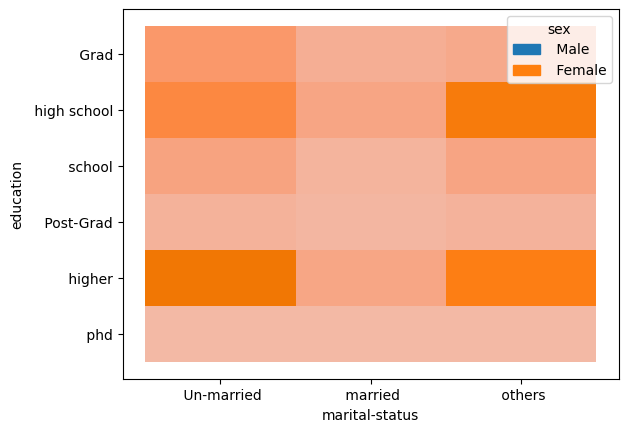

In [106]:
sns.histplot(data=df, x='marital-status', y='education', hue='sex', legend=True)

C:\Users\HOME\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



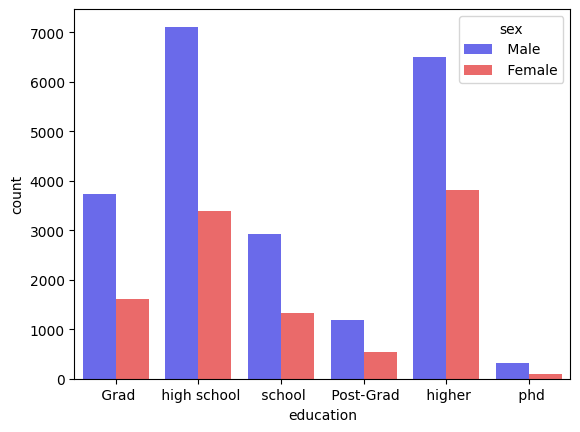

In [108]:
sns.countplot(df['education'], hue='sex', data=df, palette='seismic');